In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
import sklearn as sk
import scipy.stats as stats
import plotly.express as px

In [29]:
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [102]:
type(data)

pandas.core.frame.DataFrame

In [103]:
data.shape

(1190, 12)

In [106]:
data.info

<bound method DataFrame.info of            age  sex  chest pain type  resting bp s  cholesterol  \
0    -1.466728    1                2      0.427328     0.775674   
1    -0.504600    0                3      1.516587    -0.299512   
2    -1.787437    1                2     -0.117301     0.716489   
3    -0.611503    0                4      0.318402     0.035867   
4     0.029915    1                3      0.971958    -0.151550   
...        ...  ...              ...           ...          ...   
1185 -0.932213    1                1     -1.206560     0.529071   
1186  1.526558    1                4      0.645180    -0.171279   
1187  0.350624    1                4     -0.117301    -0.782852   
1188  0.350624    0                2     -0.117301     0.252877   
1189 -1.680534    1                3      0.318402    -0.348832   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1            

In [30]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [31]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [47]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [48]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [32]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [107]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
Name: target, dtype: float64


In [33]:
target_temp = data.target.value_counts()

In [34]:
print(target_temp)

1    629
0    561
Name: target, dtype: int64


In [35]:
print("Percentage of patient without heart disease: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patient with heart disease: "+str(round(target_temp[1]*100/303,2)))

Percentage of patient without heart disease: 185.15
Percentage of patient with heart disease: 207.59


In [36]:
y = data['target']

In [37]:
data["chest pain type"].unique()

array([2, 3, 4, 1], dtype=int64)

c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest pain type', ylabel='target'>

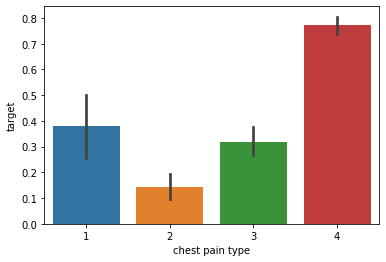

In [38]:
sns.barplot(data["chest pain type"],y)

In [39]:
data["sex"].unique()

array([1, 0], dtype=int64)

c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

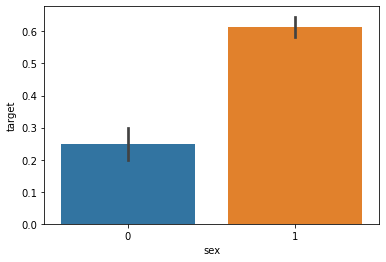

In [40]:
sns.barplot(data["sex"],y)

In [42]:
data["target"].value_counts()

1    629
0    561
Name: target, dtype: int64

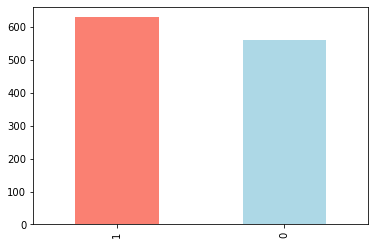

In [43]:
data["target"].value_counts().plot(kind = "bar", color = ["salmon","lightblue"]);

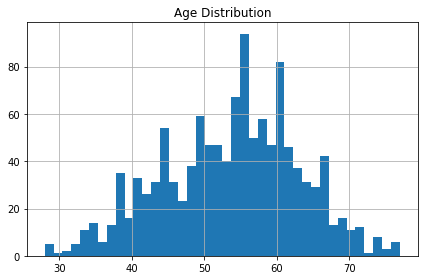

In [46]:
data['age'].hist(bins = 40)
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


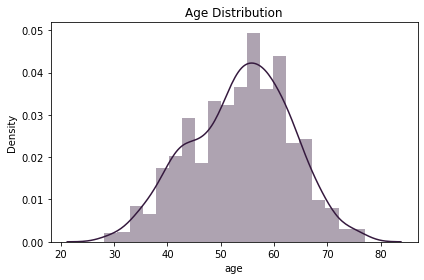

In [59]:
sns.distplot(data['age'])
plt.title("Age Distribution")
plt.tight_layout()

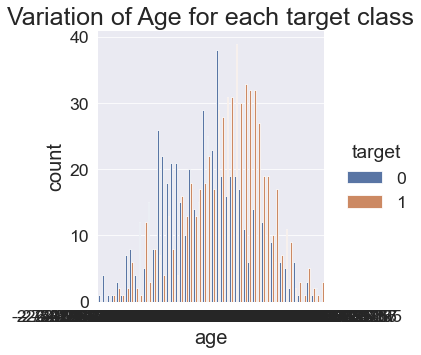

In [111]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = data, x = 'age', hue = 'target', order = data['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

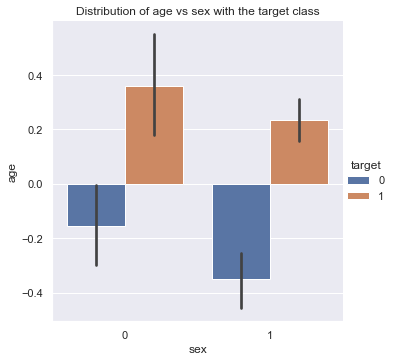

In [109]:
sns.catplot(kind = 'bar', data = data, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [51]:
data['sex'].value_counts()

1    909
0    281
Name: sex, dtype: int64

c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x20e6920c880>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

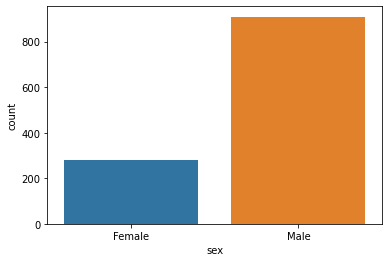

In [49]:
sns.countplot(data['sex'])
plt.xticks([0,1],['Female','Male'])

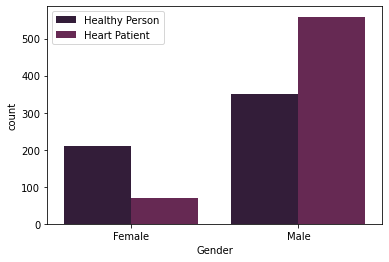

In [52]:
sns.set_palette("rocket")
sns.countplot(x = 'sex', hue = 'target', data = data)
plt.xticks([0,1],['Female','Male'])
plt.xlabel("Gender")
plt.legend(labels=['Healthy Person', 'Heart Patient'])

CHEST PAIN TYPES
1: Typical Angina
2: Atypical Angina
3: Non Anginal Pain
4: Asymptomatic

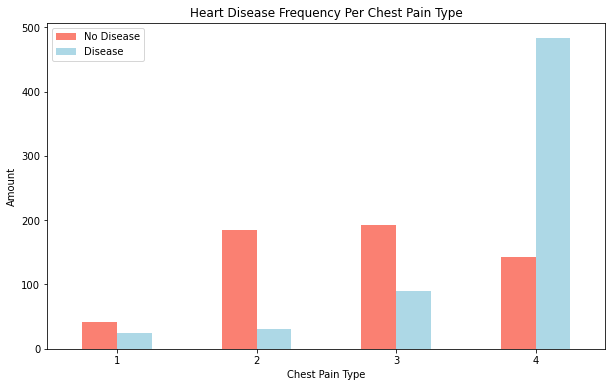

In [60]:
pd.crosstab(data['chest pain type'], data['target']).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

<AxesSubplot:xlabel='chest pain type'>

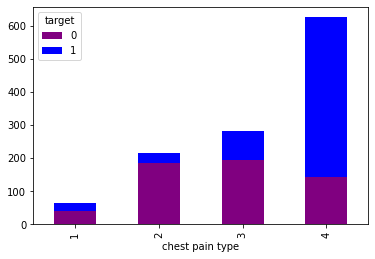

In [61]:
chest_pain=pd.crosstab(data['chest pain type'], data['target'])
chest_pain
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

<AxesSubplot:>

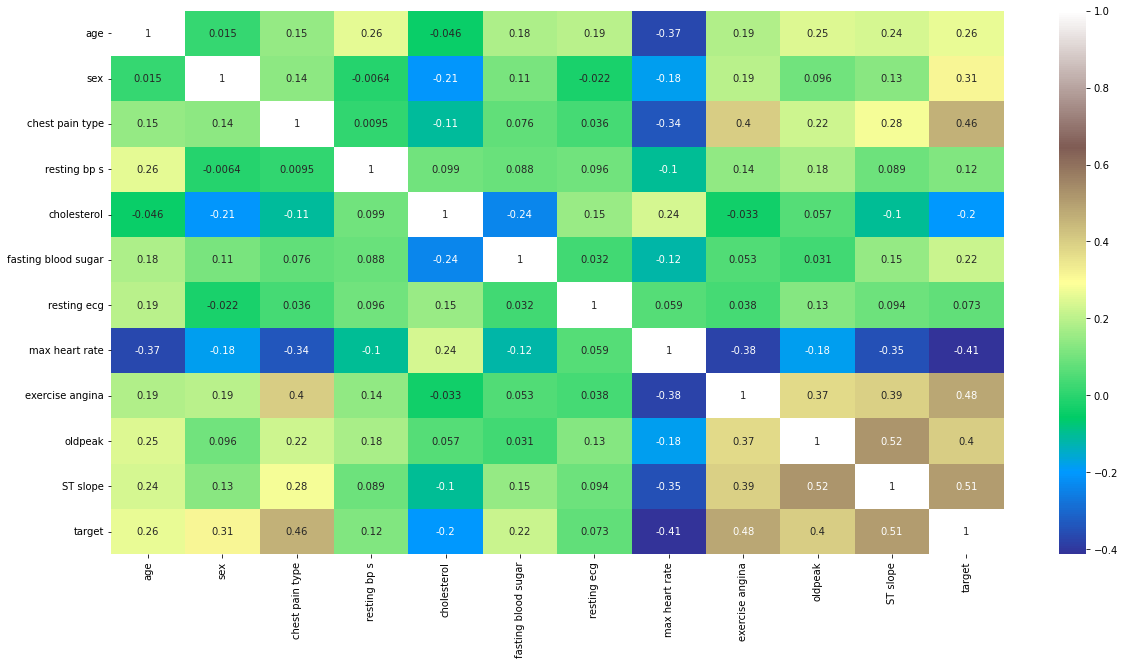

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='terrain')

<Figure size 3600x3600 with 0 Axes>

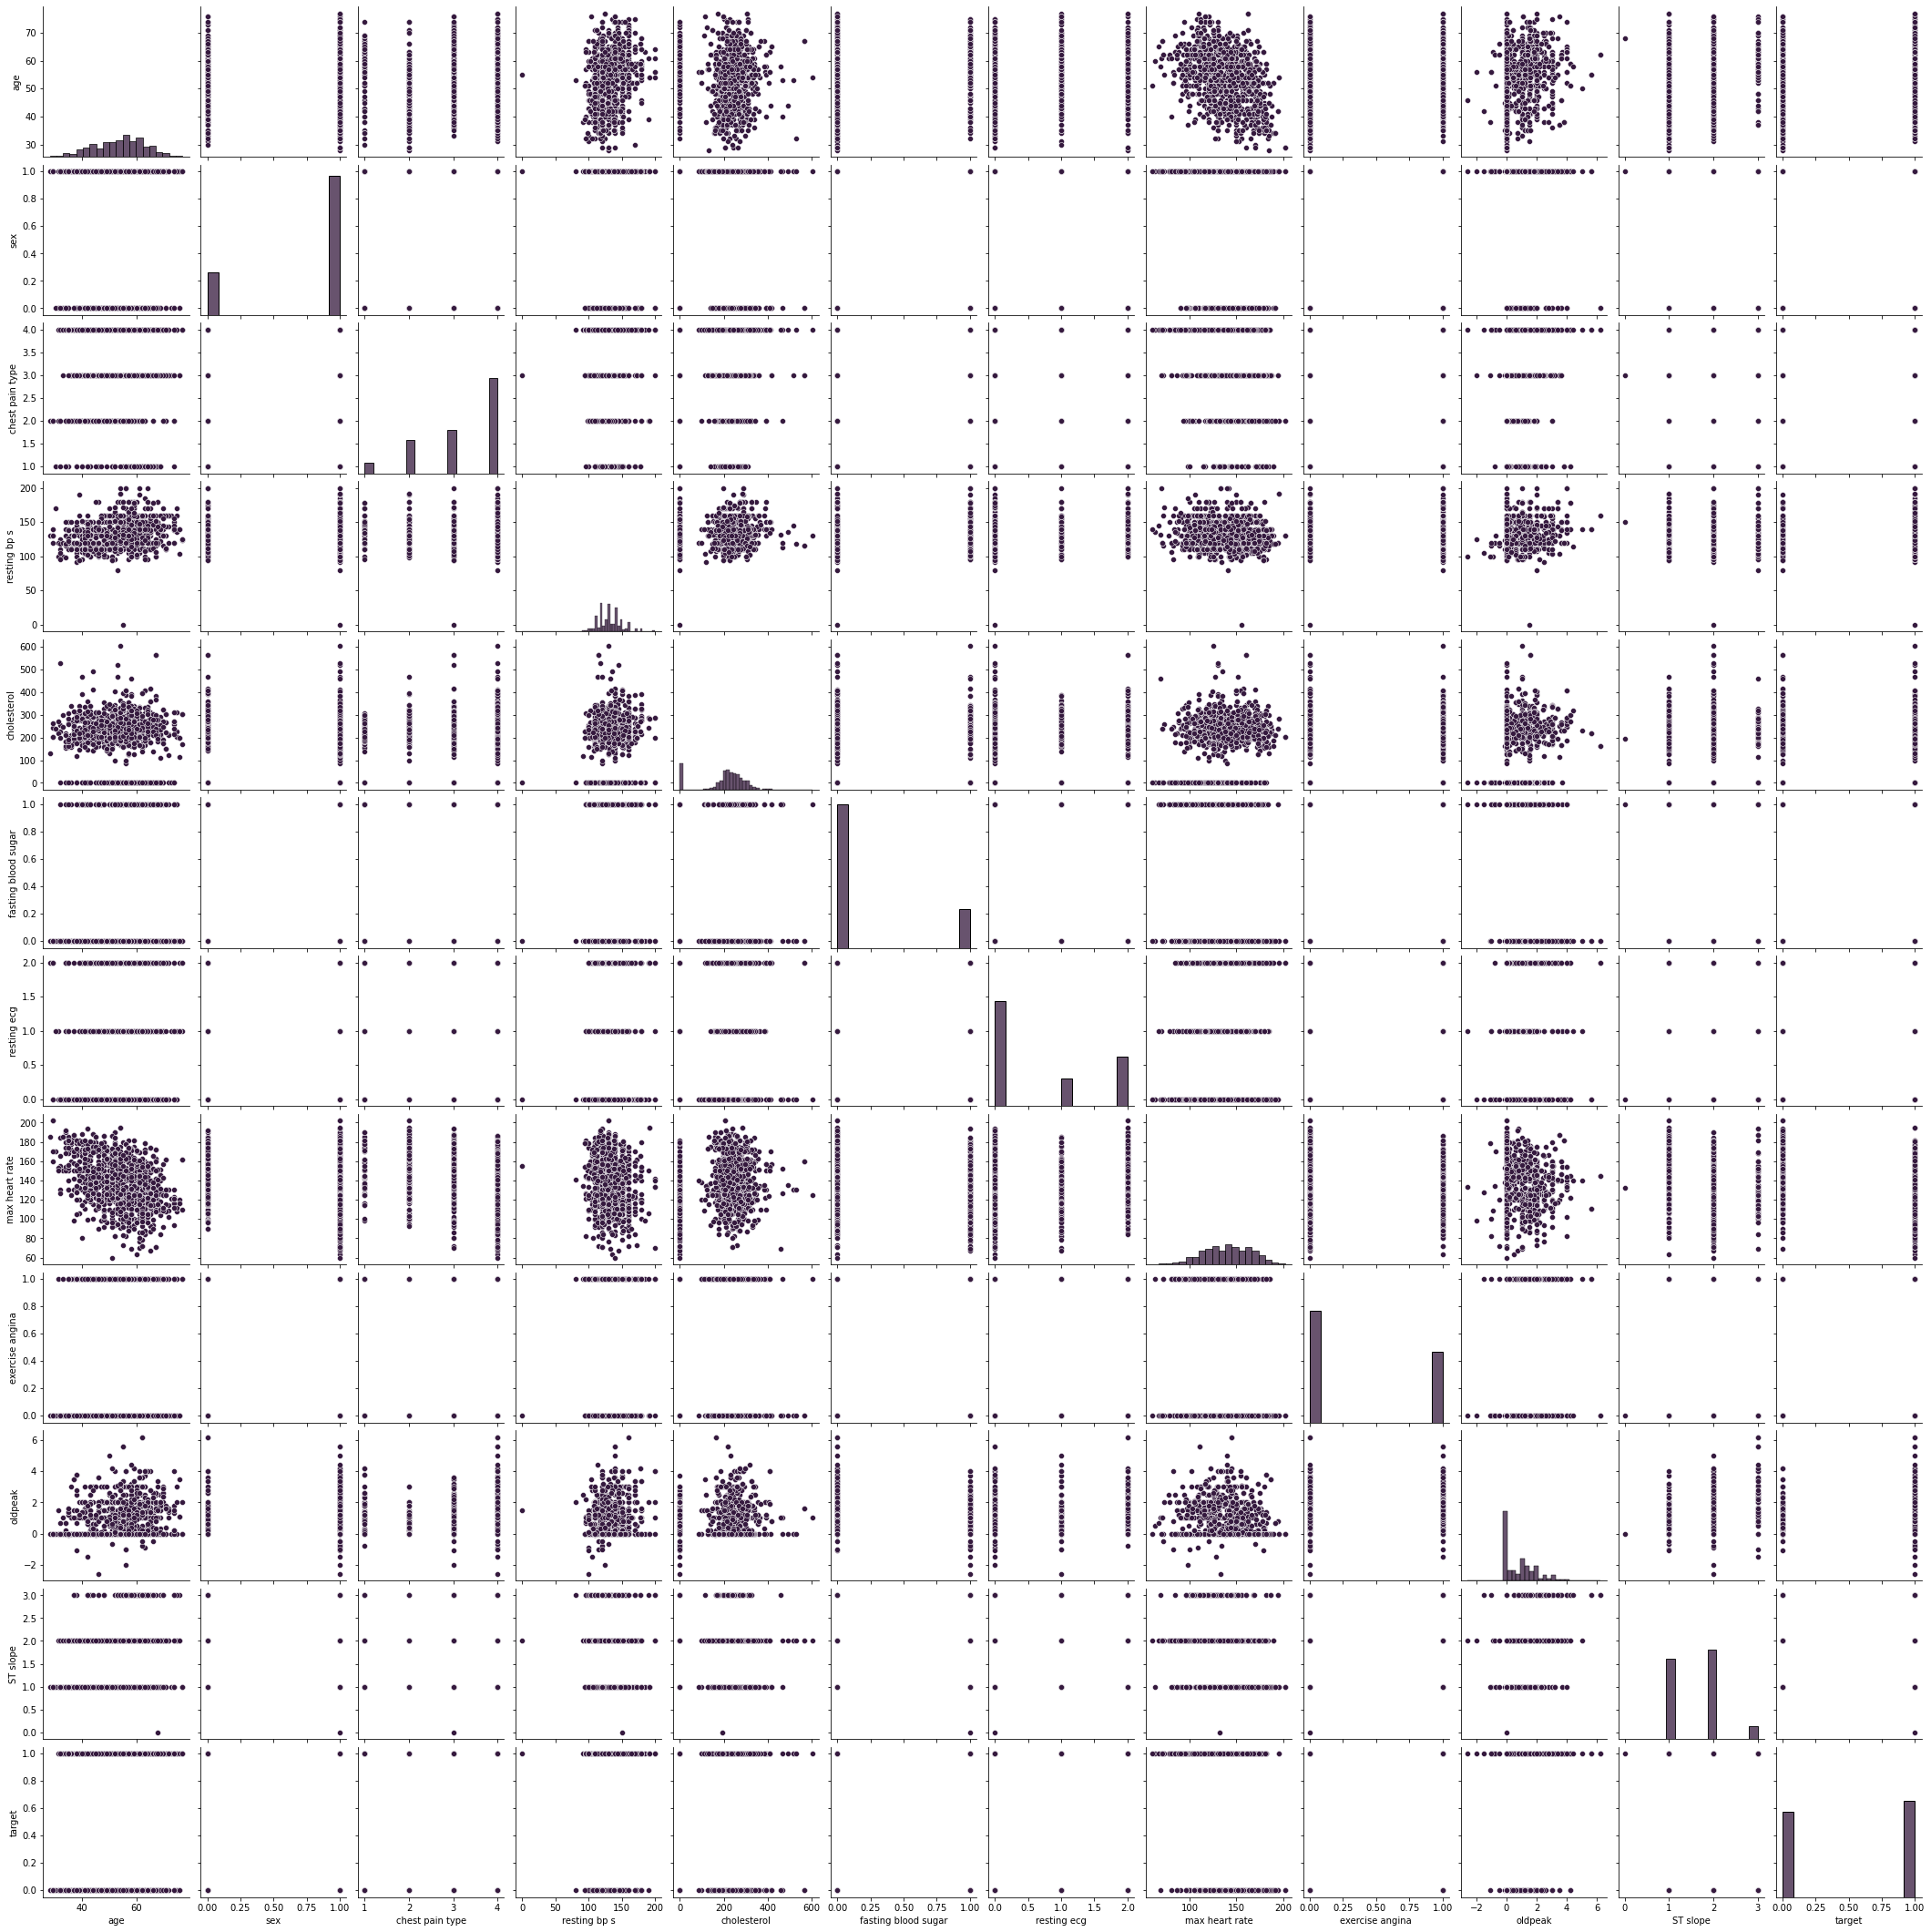

In [63]:
plt.figure(figsize=(50,50))
sns.pairplot(data=data)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest pain type'}>],
       [<AxesSubplot:title={'center':'resting bp s'}>,
        <AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting blood sugar'}>],
       [<AxesSubplot:title={'center':'resting ecg'}>,
        <AxesSubplot:title={'center':'max heart rate'}>,
        <AxesSubplot:title={'center':'exercise angina'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'ST slope'}>,
        <AxesSubplot:title={'center':'target'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

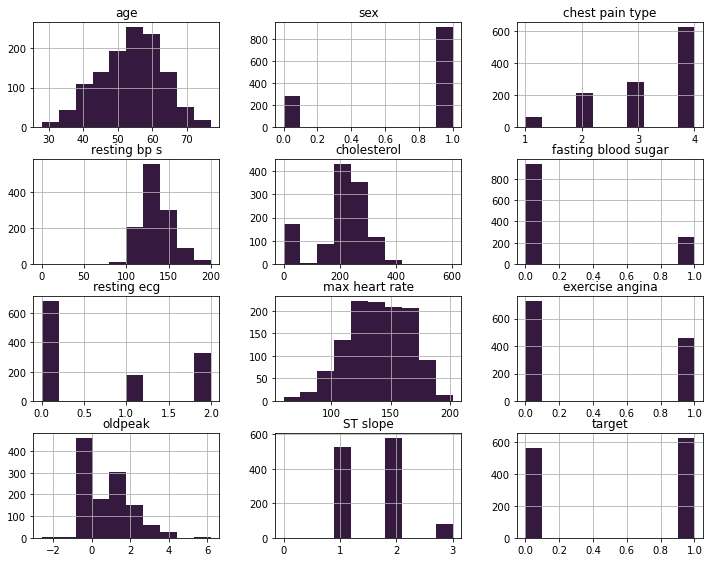

In [64]:
data.hist(figsize=(12,12), layout=(5,3))

SEX
0: Female
1: Male

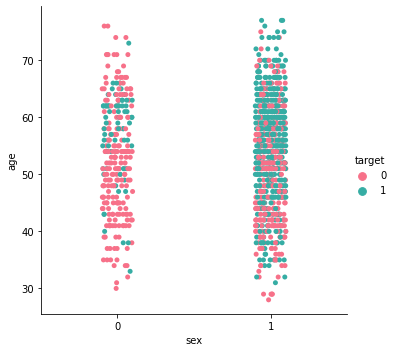

In [65]:
sns.catplot(data=data, x='sex', y='age', hue='target', palette='husl')

<AxesSubplot:xlabel='sex', ylabel='cholesterol'>

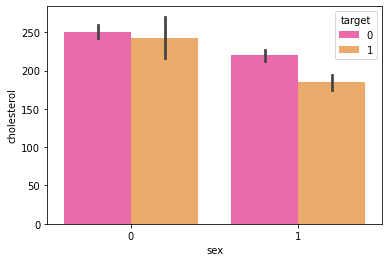

In [66]:
sns.barplot(data=data, x='sex', y='cholesterol', hue='target', palette='spring')

<AxesSubplot:xlabel='chest pain type', ylabel='count'>

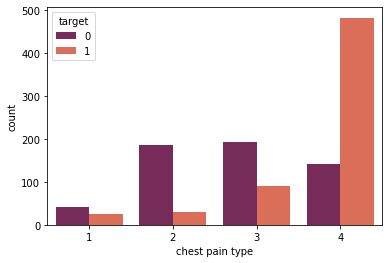

In [67]:
sns.countplot(x='chest pain type', hue='target', data=data, palette='rocket')

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
predictors = data.drop("target",axis = 1)
target = data['target']

In [70]:
X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=1)

In [71]:
print('The shape of X_train is : ',X_train.shape)
print('The shape of X_test is : ',X_test.shape)


The shape of X_train is :  (952, 11)
The shape of X_test is :  (238, 11)


In [73]:
print('The shape of Y_train is : ',y_train.shape)
print('The shape of Y_test is : ',y_test.shape)

The shape of Y_train is :  (952,)
The shape of Y_test is :  (238,)


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [76]:
ss = StandardScaler()
columns_to_scale = ['age','resting bp s','cholesterol','oldpeak']
data[columns_to_scale] = ss.fit_transform(data[columns_to_scale])

In [80]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.61 %


c:\Users\THRISHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.naive_bayes import GaussianNB

In [83]:
nb = GaussianNB()
nb.fit(X_train,y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.97 %


In [90]:
from sklearn.svm import SVC

In [91]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Support Vector Machine is: "+str(score_svm)+"%")

The accuracy score achieved using Support Vector Machine is: 71.85%


In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNeighbors Classifier is: "+str(score_knn)+"%")

The accuracy score achieved using KNeighbors Classifier is: 70.17%


In [84]:
from sklearn.tree import DecisionTreeClassifier


In [86]:
max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 93.28 %


In [92]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
max_accuracy = 0

for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+"%")

The accuracy score achieved using Random Forest is: 95.38%


In [100]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The accuracy score achieved using Logistic Regression is: 83.61%
The accuracy score achieved using Naive Bayes is: 86.97%
The accuracy score achieved using Support Vector Machine is: 71.85%
The accuracy score achieved using K-Nearest Neighbors is: 70.17%
The accuracy score achieved using Decision Tree is: 93.28%
The accuracy score achieved using Random Forest is: 95.38%


c:\Users\THRISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

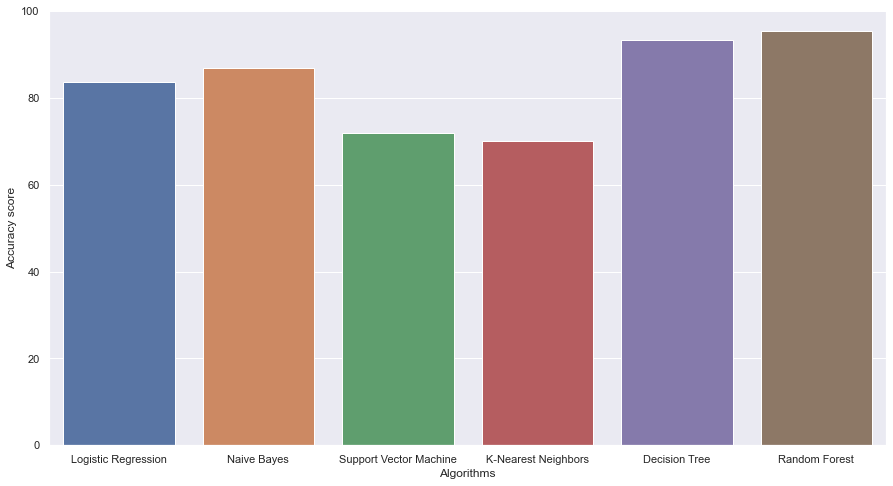

In [101]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)